In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import os.path
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pickle
import filehandling
from cavityclass import *

LAM = 1064*10**(-7) 
M2_x = 1.453
M2_y = 1.678

In [5]:
with open('filepath.pkl','rb') as f:
    filepath = pickle.load(f)
ds18 = Cavity(filepath, LAM)
print(ds18.cavity)
xcav = Cavity(ds18.get_xcav().cavity, LAM*M2_x)
ycav = Cavity(ds18.get_ycav().cavity, LAM*M2_y)

[['M', 0.0], ['D', 20.0], ['M', -70.0, 25.0], ['D', 3.5], ['L', 19.0], ['D', 3.5], ['M', -100.0, 25.0], ['D', 19.5], ['B', 1.5], ['D', 5.0], ['M', 0.0]]


Enter M-Squared for x-axis:    1
Enter M-Squared for y-axis:    1
X-Axis
     Divergence  Rayleigh Range  Spot Size
M  1.574973e-19      100.379757   0.116614
D  2.270038e-04      100.379757   0.118906
M  3.975515e-03        7.921088   0.118906
D  4.007915e-03        7.921088   0.132880
L -2.985759e-03       13.609648   0.132880
D -2.954790e-03       13.609648   0.122482
M -2.519195e-04      105.275161   0.122482
D -4.820547e-05      105.275161   0.119531
B -4.561811e-05      117.555809   0.126311
D -3.325399e-19      117.555809   0.126197
M -3.325399e-19      117.555809   0.126197
Y-Axis
     Divergence  Rayleigh Range  Spot Size
M -4.375580e-20       55.852817   0.086986
D  5.250378e-04       55.852817   0.092394
M  2.917548e-03       12.706182   0.092394
D  2.987148e-03       12.706182   0.102734
L -2.419913e-03       17.837378   0.102734
D -2.352531e-03       17.837378   0.094377
M -6.418314e-04       54.793482   0.094377
D -1.428900e-04       54.793482   0.086515
D  2.039026e-19  

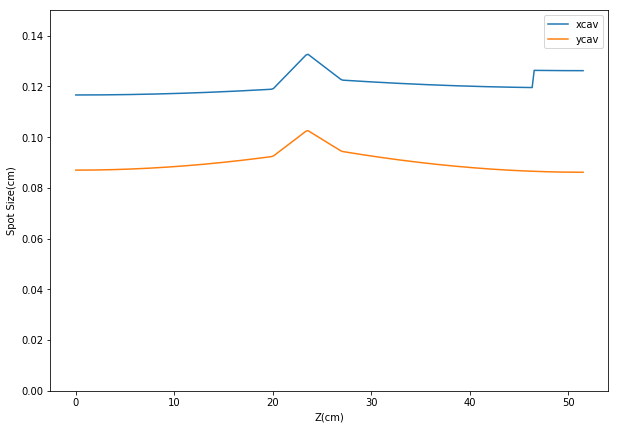

In [6]:
%run plotcav.py

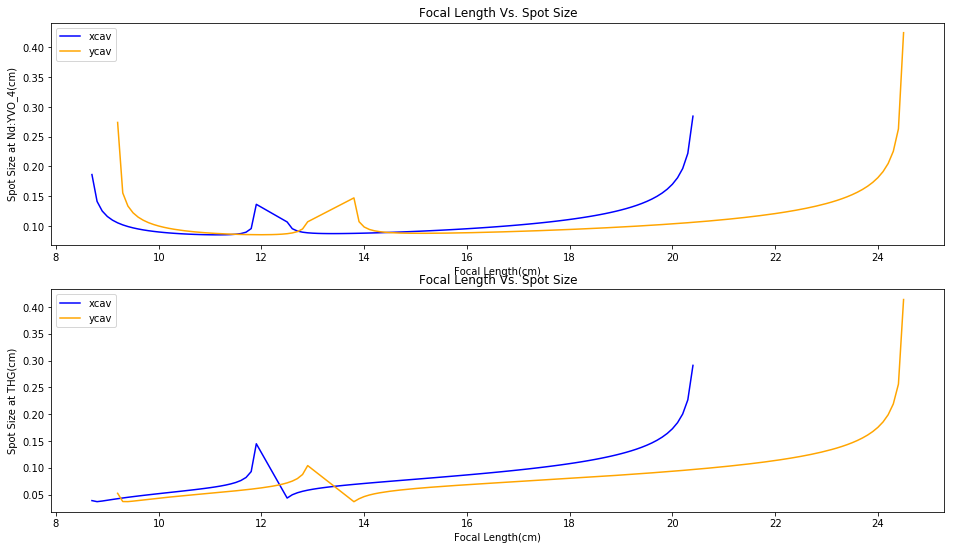

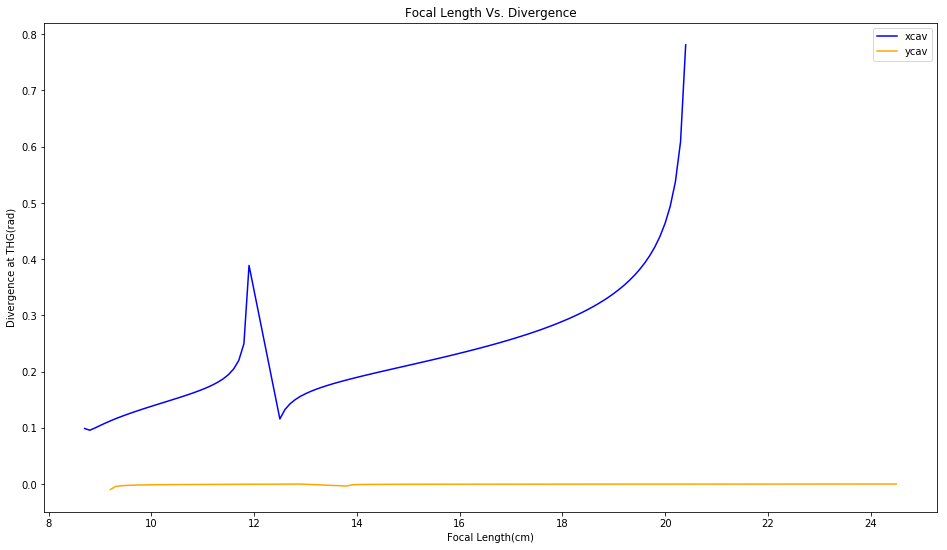

In [7]:
Wx_at_THG = []
Wx_at_V = []
Wy_at_THG = []
Wy_at_V = []
Dx_at_THG = []
Dy_at_THG = []
Fx = []
Fy = []
for i in np.arange(5,30,.1):
    new_xcav = xcav.remove_optic(5).insert_optic('L',i,5)
    new_ycav = ycav.remove_optic(5).insert_optic('L',i,5)
    if new_xcav.is_stable:
        Wx_at_V.append(new_xcav.waist(22))
        Wx_at_THG.append(new_xcav.waist(new_xcav.L - 4.99))
        Dx_at_THG.append(new_xcav.div(new_xcav.L - 4.99))
        Fx.append(i)
        
    if new_ycav.is_stable:
        Wy_at_V.append(new_ycav.waist(22))
        Wy_at_THG.append(new_ycav.waist(new_ycav.L - 4.99))
        Dy_at_THG.append(new_ycav.div(new_ycav.L - 4.99))
        Fy.append(i)                   

fig2 = plt.figure(figsize=(16,9))
ax21 = fig2.add_subplot(2,1,1)
ax21.plot(Fx, Wx_at_V, 'b', label='xcav')
ax21.plot(Fy, Wy_at_V, 'orange', label='ycav')
ax21.set_title('Focal Length Vs. Spot Size')
ax21.set_xlabel('Focal Length(cm)')
ax21.set_ylabel('Spot Size at Nd:YVO_4(cm)')
ax21.legend()

ax22 = fig2.add_subplot(2,1,2)
ax22.plot(Fx, Wx_at_THG, 'b', label='xcav')
ax22.plot(Fy, Wy_at_THG, 'orange', label='ycav')
ax22.set_title('Focal Length Vs. Spot Size')
ax22.set_xlabel('Focal Length(cm)')
ax22.set_ylabel('Spot Size at THG(cm)')
ax22.legend()

fig3 = plt.figure(figsize=(16,9))
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(Fx, Dx_at_THG, 'b', label='xcav')
ax3.plot(Fy, Dy_at_THG, 'orange', label='ycav')
ax3.set_title('Focal Length Vs. Divergence')
ax3.set_xlabel('Focal Length(cm)')
ax3.set_ylabel('Divergence at THG(rad)')
ax3.legend()

#d1 = {'Focal Length X (cm)': Fx, 'Focal Length Y (cm)': Fy, 'Spot Size X at Nd:YVO_4 (um)': Wx_at_V, 'Spot Size Y at Nd:YVO_4 (um)': Wy_at_V}
#d2 = {'Focal Length X (cm)': Fx, 'Focal Length Y (cm)': Fy, 'Spot Size X at THG (um)': Wx_at_THG, 'Spot Size Y at THG (um)': Wy_at_THG}

#df1 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d1.items() ]))
#df1.to_excel('Spotsize_ndyvo4_7,7A.xls', index = False)
#df2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d2.items() ]))
#df2.to_excel('Spotsize_THG_7,7A.xls', index = False)
#plt.show()